In [1]:
import numpy as np
from matplotlib import pyplot as plt
image_path = "assets/not_treated.pgm"
image2_path = "assets/portraitWritten.pgm"

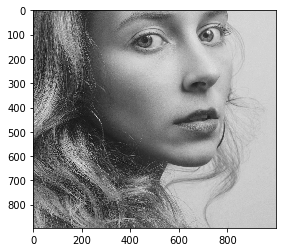

In [2]:
def readPGM(image_path):
    with open(image_path, "rb") as f:
        assert(f.read(1) == b'P')
        assert(f.read(1) in [b'2',b'5'])
        assert(f.read(1) == b'\n')
        #ignore comments
        byte = f.read(1)
        if(byte == b'#'):
            while(not byte == b'\n'):
                byte = f.read(1)
        #read dimentions
        width = b''
        while(not byte == b' '):
            width += byte
            byte = f.read(1)
        width = int(width.decode("utf-8"))
        height = b''
        byte = f.read(1)
        while(not byte == b'\n'):
            height += byte
            byte = f.read(1)
        height = int(height.decode("utf-8"))
        max_grayscale_value = b''
        byte = f.read(1)
        while(not byte == b'\n'):
            max_grayscale_value += byte
            byte = f.read(1)
        max_grayscale_value = int(max_grayscale_value.decode("utf-8"))
        array = np.empty((height, width), dtype=float)
        for row in range(0, height):
            for col in range(0, width):
                array[row, col] = int.from_bytes(f.read(1), "big")
        return array

image = readPGM(image_path)
plt.imshow(image, interpolation='nearest',cmap='gray')
plt.show()

In [3]:
def writePGM(matrix, name):
    with open(name, "wb") as f:
        f.write(b'P5\n')
        height, width = matrix.shape
        max_grayscale_value = 255
        f.write(str(width).encode("utf-8") + b' ' + str(height).encode("utf-8") + b'\n' + str(max_grayscale_value).encode("utf-8") + b'\n')
        for row in range(0, height):
            for col in range(0, width):
                f.write(int(matrix[row, col]).to_bytes(1, "big"))
writePGM(image, image2_path)

In [4]:
def moyenne(image):
    return np.average(image)
print(f"moyenne = {moyenne(image)}")

moyenne = 130.32995535714286


In [5]:
def ecart_type(image):
    return np.std(image)
print(f"ecart-type = {ecart_type(image)}")

ecart-type = 53.88412416520825


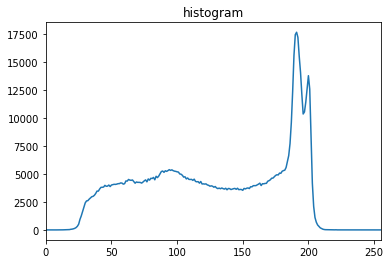

In [6]:
def histogram(image, show=True):
    hist,bin = np.histogram(image.ravel(),256,[0,255])
    if(show):
        plt.xlim([0,255])
        plt.plot(hist)
        plt.title('histogram')
        plt.show()
    return hist
histogram(image);

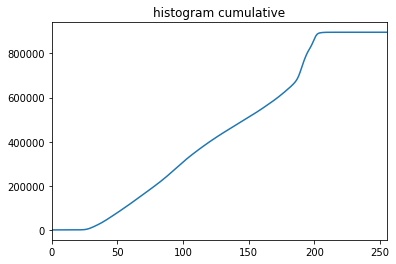

In [7]:
def histogram_cummulative(image, show=True):
    hist = histogram(image, show=False)
    hc = np.zeros(256,int)
    hc[0] = hist[0]
    for index in range(1,len(hist)): 
        hc[index]= hist[index] + hc[index -1]
    if(show):
        plt.xlim([0,255])
        plt.plot(hc)
        plt.title('histogram cumulative')
        plt.show()
    return hc
histogram_cummulative(image);